<a href="https://colab.research.google.com/github/AnaAleixo/Projeto-Apl-IV/blob/main/Notebook_do_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

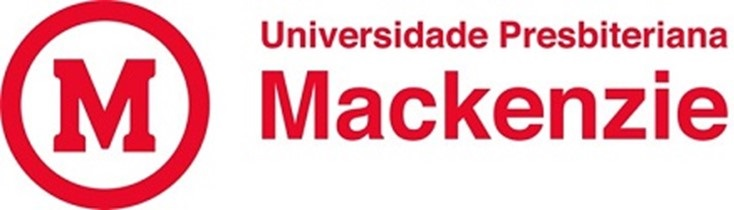

# PROJETO APLICADO IV - Ciência de Dados EaD - 2025/01
## Entrega 3

# Análise e Previsão da Evasão Escolar na Educação Infantil: Uma Abordagem de Séries Temporais com Foco em Políticas Públicas

# **Notebook**


**PIPELINE DA METODOLOGIA- EDA**

Pipeline metodológico da EDA, etapa por etapa, com os objetivos de cada ação e explicação do uso dos dados do Censo Escolar (2020–2024), foco na evasão escolar na Educação Infantil, objetivando criar um modelo de série temporal.

**1. Etapa de Análise Exploratória dos Dados (EDA)**
  * 1.1 Compreensão da fonte de dados
    - Origem: Censo Escolar (INEP) – 2020 a 2024
    - Variável observada: Número de alunos matriculados na Educação Infantil
    - Segmentações:
    - Etapa: Creche e Pré-escola
    - Turno: Parcial e Integral
    - Rede/localização: Estadual/Municipal, Urbana/Rural
    - Objetivo: Conhecer a estrutura dos dados, suas segmentações e refletir sobre o que pode influenciar a evasão (ex: localização, tipo de turno, etc.).

  * **1.2 Leitura e limpeza dos dados**
    - 	Importação da planilha em .xlsx com a estrutura padronizada.
    - 	Definição correta dos nomes das colunas (Etapa, Turno, Rede_Localizacao, Ano, Total).
    - 	Conversão das colunas Ano e Total para tipos numéricos (int, float).
    - Objetivo: Garantir que os dados estejam no formato correto para análises estatísticas e temporais, evitando erros futuros no modelo.

  * **1.3 Segmentação por grupo de análise**
    - Dividimos os dados em 4 subconjuntos:
      1.	Educação Infantil – Turno Parcial
      2.	Educação Infantil – Turno Integral
      3.	Pré-escola – Turno Parcial
      4.	Pré-escola – Turno Integral
    - Objetivo: Analisar padrões individualmente dentro de cada realidade, já que a evasão pode se comportar de forma diferente entre esses grupos.

  * **1.4 Análise visual (gráficos de linha por ano)**
    -	Evolução das matrículas ao longo dos anos, separadas por Rede_Localizacao.
    -	Uso de escala logarítmica quando há grande discrepância entre redes.
    -	Gráficos específicos para grupos pequenos (ex: Estadual Urbana), com visualização isolada.
    - Objetivo: Identificar tendências temporais, quedas abruptas ou crescimentos incomuns que podem indicar pontos de atenção para políticas públicas.

  - **1.5 Estatística descritiva por grupo**
    -	Cálculo de média, desvio padrão, valores mínimo e máximo por grupo.
    -	Avaliação da dispersão entre redes e turnos.
    - Objetivo: Ter uma visão numérica da concentração ou variabilidade dos dados, ajudando a entender se o comportamento é homogêneo ou desigual entre as categorias.

## **Por que seguimos esse caminho?**
  - a) Começamos pela estruturação dos dados para garantir consistência na base.
  - b)	Optamos por uma EDA segmentada porque a evasão escolar tem múltiplos determinantes contextuais (ex: rede municipal rural pode ter comportamento diferente da rede estadual urbana).
  - c) 	A análise visual serve para apoiar a modelagem futura: conseguimos avaliar se as séries têm tendência, sazonalidade ou rupturas, o que será essencial para a escolha e calibração dos modelos preditivos (como Prophet ou ARIMA).


## Etapa da EDA para Modelagem de Séries Temporais - Evasão Escolar

In [1]:
# Notebook: EDA para Modelagem de Séries Temporais - Evasão Escolar

# 1. Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. Leitura e preparação inicial dos dados
df = pd.read_excel('/content/dadosit1.xlsx', header=1)
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df['Ano'] = df['Ano'].astype(int)
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

In [3]:
# 3. Divisão dos dados em grupos
inf_parcial = df[(df['Etapa'] == 'Educação Infantil') & (df['Turno'] == 'Parcial')]
inf_integral = df[(df['Etapa'] == 'Educação Infantil') & (df['Turno'] == 'Integral')]
pre_parcial = df[(df['Etapa'] == 'Pré-escola') & (df['Turno'] == 'Parcial')]
pre_integral = df[(df['Etapa'] == 'Pré-escola') & (df['Turno'] == 'Integral')]

In [4]:
# 4. Função para EDA por grupo
def eda_grupo(df_grupo, titulo):
    print(f"\nEstatísticas descritivas - {titulo}:")
    print(df_grupo['Total'].describe())

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_grupo, x='Ano', y='Total', hue='Rede_Localizacao', marker='o')
    plt.yscale('log')
    plt.title(f'{titulo} por Rede/Localização (Escala Logarítmica)')
    plt.xlabel('Ano')
    plt.ylabel('Total de Matrículas/Evasões (log)')
    plt.grid(True, which="both", ls="--")
    plt.tight_layout()
    plt.show()


Estatísticas descritivas - Educação Infantil - Parcial:
count        21.000000
mean     267843.619048
std      360827.448478
min         365.000000
25%         885.000000
50%      174988.000000
75%      229667.000000
max      910689.000000
Name: Total, dtype: float64


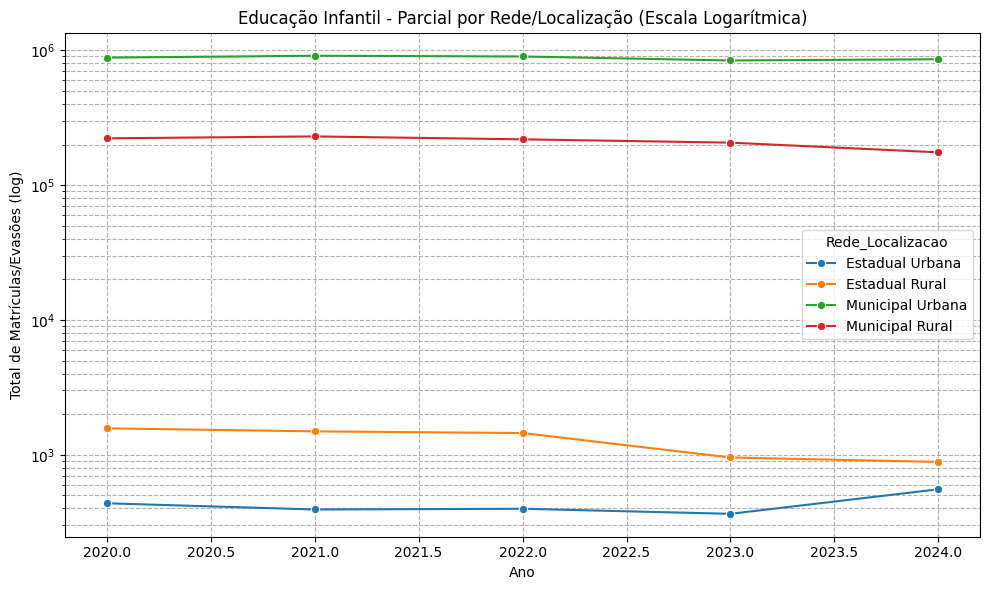


Estatísticas descritivas - Educação Infantil - Integral:
count    2.000000e+01
mean     3.648514e+05
std      6.059682e+05
min      9.700000e+01
25%      1.008250e+03
50%      2.832050e+04
75%      3.835872e+05
max      1.513529e+06
Name: Total, dtype: float64


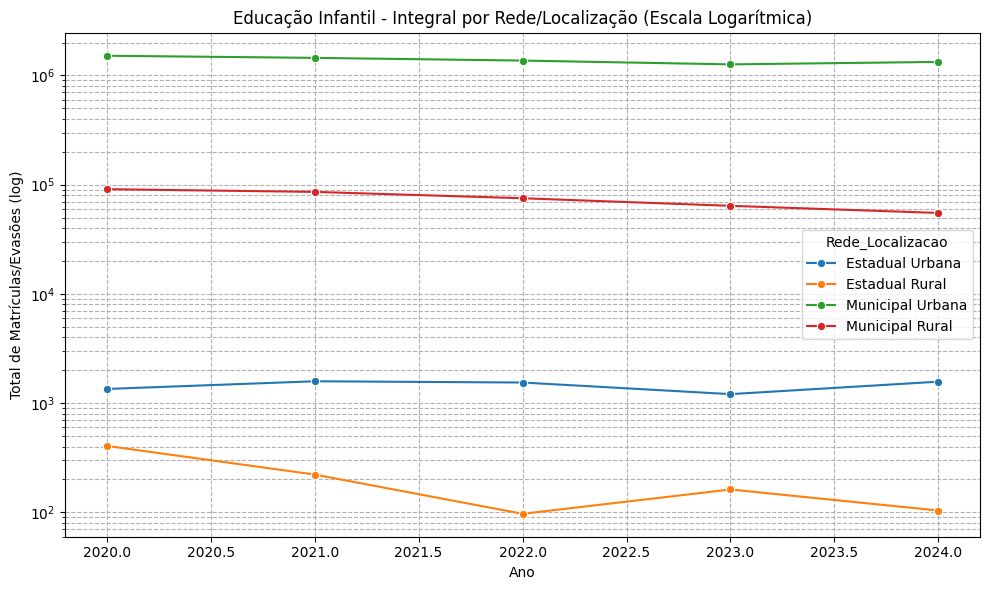


Estatísticas descritivas - Pré-escola - Parcial:
count    2.000000e+01
mean     8.782343e+05
std      1.197803e+06
min      8.249000e+03
25%      3.364975e+04
50%      3.152505e+05
75%      1.151736e+06
max      2.932734e+06
Name: Total, dtype: float64


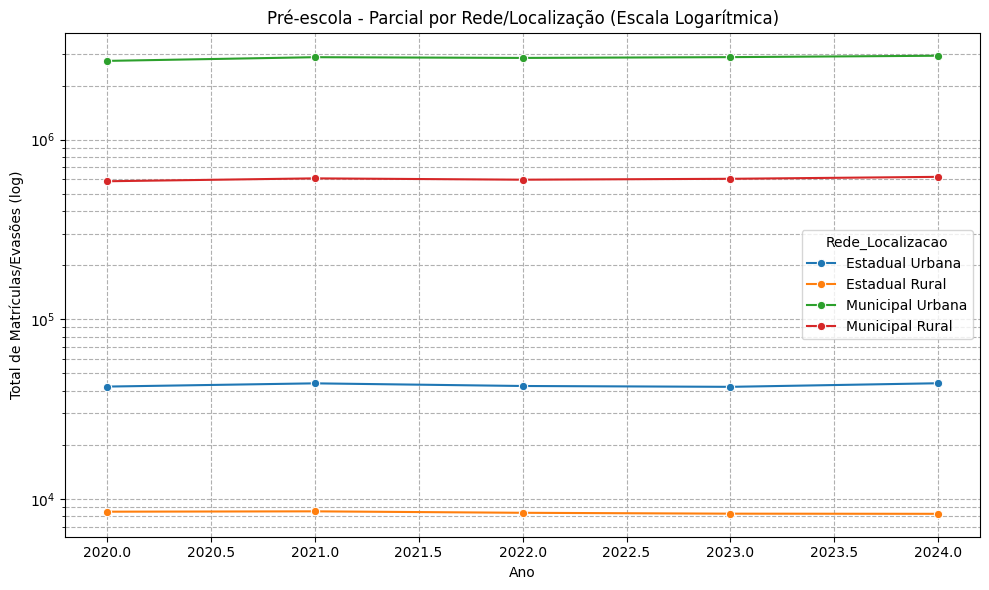


Estatísticas descritivas - Pré-escola - Integral:
count        20.000000
mean     109424.300000
std      168777.270209
min          89.000000
25%         800.500000
50%       14979.000000
75%      137148.750000
max      456374.000000
Name: Total, dtype: float64


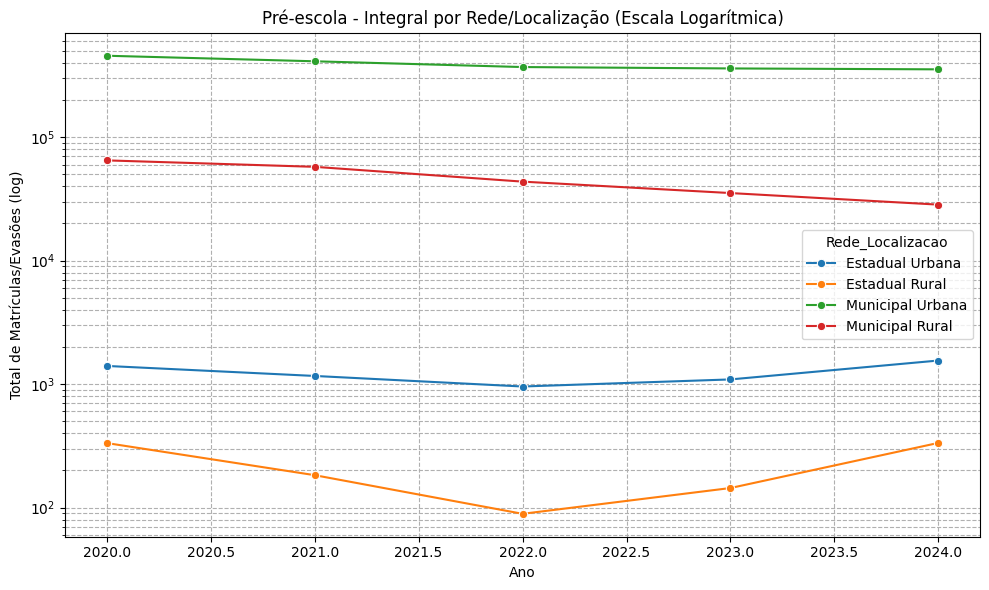

In [5]:
# 5. Execução da EDA para cada grupo
eda_grupo(inf_parcial, "Educação Infantil - Parcial")
eda_grupo(inf_integral, "Educação Infantil - Integral")
eda_grupo(pre_parcial, "Pré-escola - Parcial")
eda_grupo(pre_integral, "Pré-escola - Integral")


# **Relatório da Análise da EDA**

- **Educação Infantil – Turno Parcial**
  - A distribuição é assimétrica, com poucas redes muito grandes e muitas com matrículas baixas. O comportamento da série deve refletir isso, o que sugere que segmentar os modelos por rede/localização pode ser mais eficaz do que um modelo geral.
- **Educação Infantil – Turno Integral**
    - Aqui a disparidade é ainda maior que no parcial. A mediana mostra que mais da metade das observações estão abaixo de 30 mil, o que revela forte concentração em redes menores com poucos atendimentos integrais.
- **Pré-escola – Turno Parcial**
    - Esse grupo concentra os maiores volumes de matrícula, especialmente nas redes municipais urbanas. A alta dispersão mostra que alguns grupos estão superlotados, o que pode refletir pressão sobre infraestrutura e risco maior de evasão.
- **Pré-escola – Turno Integral**
  - Esse é o grupo com menor volume absoluto, com diversas observações muito baixas. A mediana revela que a maioria das redes tem número reduzido de alunos em turno integral na Pré-escola. Pode indicar restrição de oferta nesse perfil.

- **Educação Infantil – Turno Parcial**
  * A Municipal Urbana domina em volume de matrículas, com estabilidade no período. A Estadual Rural apresenta uma queda progressiva nas matrículas, acentuada após 2022. A Estadual Urbana possui valores baixos, mas há um crescimento entre 2023 e 2024. A Municipal Rural tem leve oscilação, mas sem grandes rupturas.
    - 📌 Indicação de tendência decrescente parcial, especialmente na Estadual Rural.
- **Educação Infantil – Turno Integral**
    * A Municipal Urbana novamente lidera em volume absoluto, com leve queda. A Estadual Rural apresenta valores extremamente baixos e decrescentes até 2022, com pequena recuperação em 2023. A Estadual Urbana mantém estabilidade com pequenas oscilações.
      - 📌 Comportamento mais irregular e menos previsível, exigindo modelo que lide bem com flutuações.

- **Pré-escola – Turno Parcial**
  * As curvas são praticamente estáveis, indicando continuidade na oferta e demanda. Há pouca variação entre anos, com a Municipal Urbana muito acima das demais.
    - 📌 Essa série tem forte componente de estacionariedade com pequeno ruído, ideal para modelos simples.

- **Pré-escola – Turno Integral**
  * A Estadual Rural apresenta os menores valores e oscilação significativa. A Municipal Urbana mantém padrão alto, porém com leve tendência de queda. A Municipal Rural apresenta queda progressiva.

    - 📌 Um padrão leve de declínio que pode ser captado por um modelo com tendência suave.
  
## Escolha do Modelo de Série Temporal
Com base na natureza dos dados analisados, usaremos a aplicação do modelo Prophet, desenvolvido pelo Facebook, por apresentar as seguintes vantagens:

    ✅ Trata bem séries com poucos pontos (ex: 5 anos)
    ✅ Modela tendência linear ou logística e sazonalidade (mesmo que mínima)
    ✅ Lida com anomalias e rupturas suaves com boa robustez
    ✅ Fácil interpretação dos componentes: tendência, sazonalidade e feriados (caso queiramos incluir)
O comportamento diferentes entre os grupos, também contribuiu na escolha da modelagem. A modelagem será realizada separadamente para cada combinação de Etapa + Turno + Rede, para possibilitar prever com mais sensibilidade os riscos de evasão.

# **PIPELINE DA METODOLOGIA- ST**

**1.0 Seleção e preparação da série temporal**

Para cada combinação de Etapa, Turno e Rede/Localização, é construída uma série temporal com duas colunas obrigatórias para o Prophet:
* ds: representa a data ou o ano no formato yyyy-mm-dd
* y: representa o valor observado (número de matrículas)
    
Essa estrutura padronizada é requerida pelo Prophet para análise e previsão temporal.

**1.1 Divisão dos dados para treinamento e validação**

Dado que a série possui apenas cinco pontos (2020 a 2024), foi adotada uma estratégia de validação prática e ética para evitar perda excessiva de informação:
  -	O modelo é inicialmente treinado com os dados de 2020 a 2023.
  -	Em seguida, realiza-se a validação usando o ano de 2024, com o intuito de avaliar se a tendência projetada se confirma com os dados mais recentes.
  Essa abordagem do tipo **“holdout temporal”** é recomendada para séries curtas, pois permite avaliar a capacidade preditiva do modelo sem comprometer sua estabilidade.

Após a validação, o modelo é reentrenado com toda a série histórica (2020–2024) para gerar as previsões para os anos seguintes (ex: 2025 a 2027).

**1.3 Instanciação e configuração do modelo Prophet**

Um modelo Prophet básico é instanciado com tendência linear. A configuração padrão é suficiente para séries curtas com baixa ou nenhuma sazonalidade aparente, como é o caso das séries analisadas. Ajustes adicionais podem ser aplicados conforme o comportamento dos dados.

**1.4 Treinamento do modelo**

O modelo é ajustado com base nos dados de treino (2020–2023) e, posteriormente, com todos os dados disponíveis para gerar previsões reais. O Prophet identifica padrões de tendência e, se necessário, ajusta automaticamente quebras ou alterações estruturais da série.

**1.5 Geração da previsão e visualização**

A previsão é realizada para os anos futuros (por exemplo, 2025 a 2027) com a função make_future_dataframe. O Prophet gera visualizações automáticas que incluem a tendência da série, intervalo de confiança e, se aplicável, componentes sazonais.



Modelando: Educação Infantil / Parcial / Estadual Rural


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjsfon5i3/9bgvl57v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjsfon5i3/neh42xcg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67964', 'data', 'file=/tmp/tmpjsfon5i3/9bgvl57v.json', 'init=/tmp/tmpjsfon5i3/neh42xcg.json', 'output', 'file=/tmp/tmpjsfon5i3/prophet_modelq3ev6zhj/prophet_model-20250421190654.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:06:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:06:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


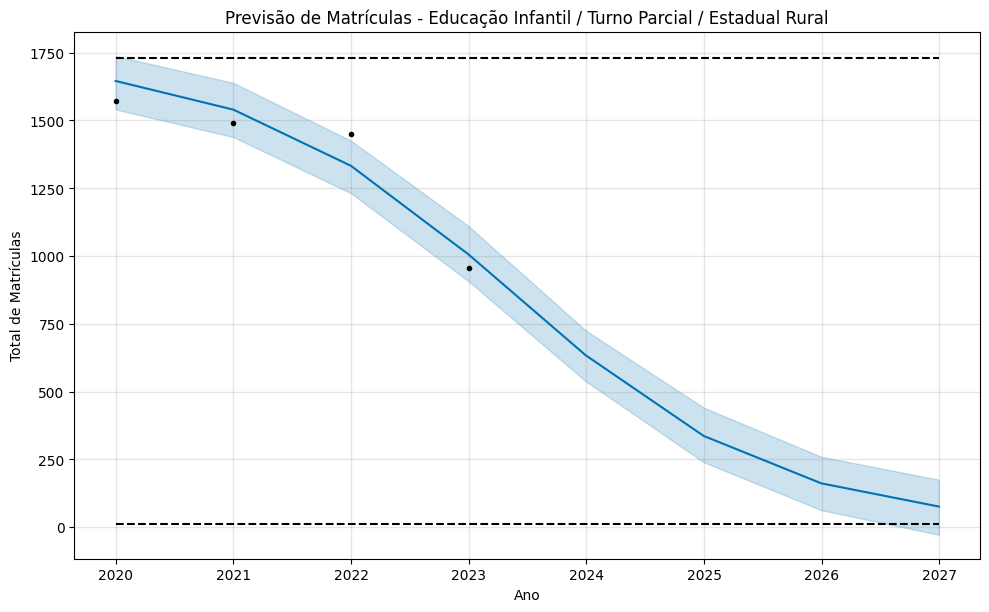

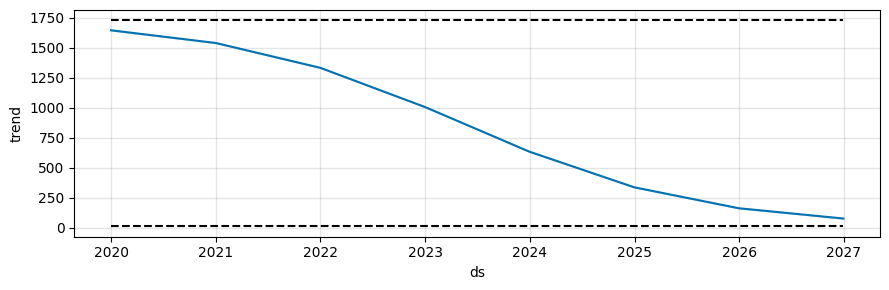

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjsfon5i3/vlitcb9s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjsfon5i3/bgum2qry.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58361', 'data', 'file=/tmp/tmpjsfon5i3/vlitcb9s.json', 'init=/tmp/tmpjsfon5i3/bgum2qry.json', 'output', 'file=/tmp/tmpjsfon5i3/prophet_modelt15yne4_/prophet_model-20250421190655.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:06:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:06:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds        yhat  yhat_lower  yhat_upper
4 2023-12-31  633.683732  537.694112  725.408290
5 2024-12-31  336.405311  239.760742  440.927655
6 2025-12-31  161.594878   62.702741  259.599930
7 2026-12-31   75.971810  -28.147320  175.140896

Modelando: Educação Infantil / Integral / Estadual Rural


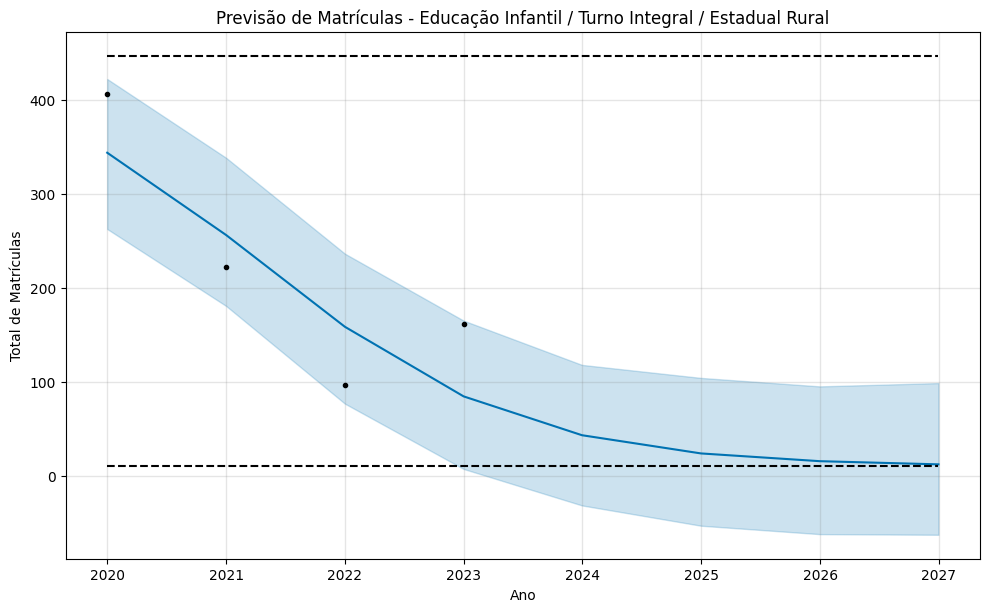

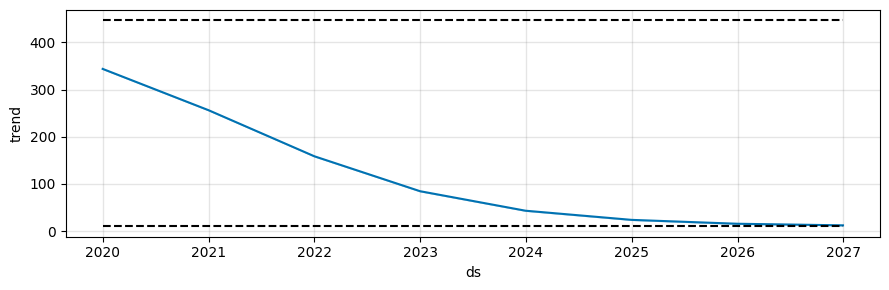

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjsfon5i3/zo7lh2oh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjsfon5i3/57rgd4sb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22398', 'data', 'file=/tmp/tmpjsfon5i3/zo7lh2oh.json', 'init=/tmp/tmpjsfon5i3/57rgd4sb.json', 'output', 'file=/tmp/tmpjsfon5i3/prophet_model9jm7gq0q/prophet_model-20250421190656.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:06:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:06:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds       yhat  yhat_lower  yhat_upper
4 2023-12-31  43.250775  -31.422302  118.034561
5 2024-12-31  23.880444  -52.993902  104.193093
6 2025-12-31  15.650670  -61.937347   95.195767
7 2026-12-31  12.274114  -62.623892   98.685814

Modelando: Pré-escola / Parcial / Estadual Rural


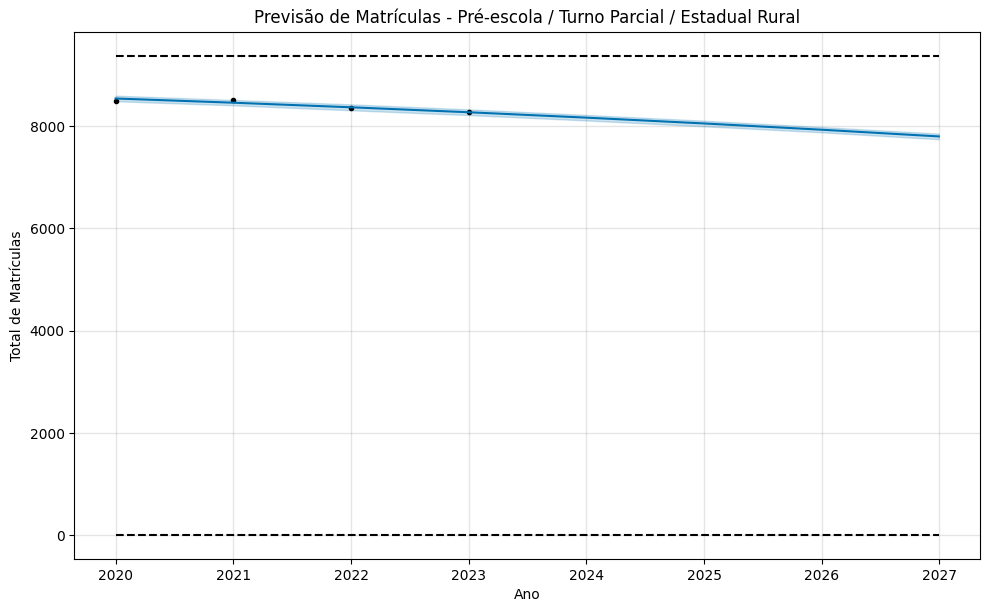

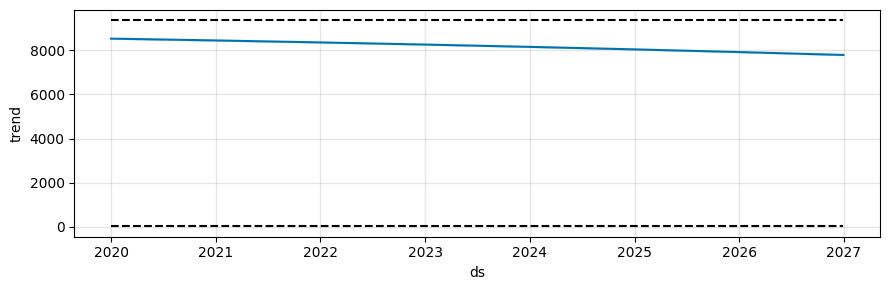

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjsfon5i3/wv1d4u_h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjsfon5i3/emh7cg62.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2477', 'data', 'file=/tmp/tmpjsfon5i3/wv1d4u_h.json', 'init=/tmp/tmpjsfon5i3/emh7cg62.json', 'output', 'file=/tmp/tmpjsfon5i3/prophet_model7guy8jzm/prophet_model-20250421190656.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:06:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:06:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds         yhat   yhat_lower   yhat_upper
4 2023-12-31  8161.463841  8105.979175  8214.260193
5 2024-12-31  8047.689354  7992.269591  8101.885041
6 2025-12-31  7925.419663  7874.292819  7977.884537
7 2026-12-31  7794.031808  7738.381695  7849.877789

Modelando: Pré-escola / Integral / Estadual Rural


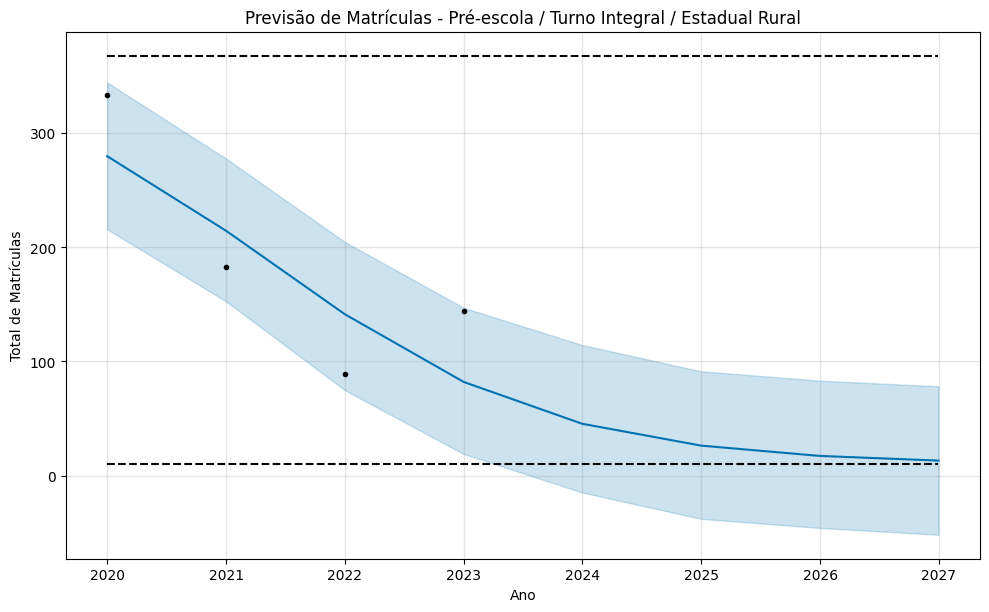

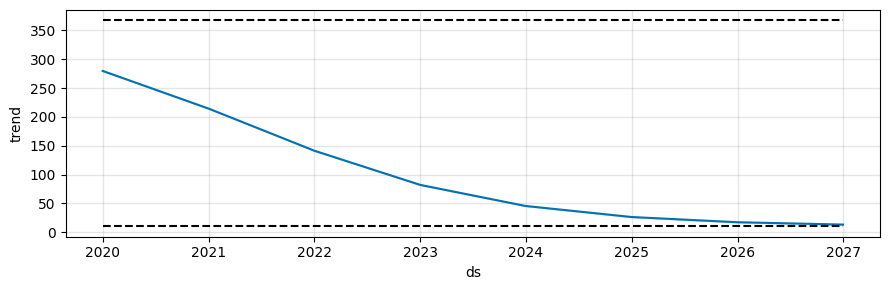

          ds       yhat  yhat_lower  yhat_upper
4 2023-12-31  45.460382  -14.681356  114.401690
5 2024-12-31  26.310054  -37.793900   91.395569
6 2025-12-31  17.284593  -45.719249   83.167167
7 2026-12-31  13.206581  -51.741941   78.255956


In [1]:
# Notebook: Modelagem de Séries Temporais com Prophet - Evasão Escolar

# 1. Instalação e importação das bibliotecas
!pip install prophet --quiet

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# 2. Leitura dos dados (ajuste o caminho conforme o seu arquivo)
df = pd.read_excel('/content/dadosit1.xlsx', header=1)
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df['Ano'] = df['Ano'].astype(int)
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

# 3. Lista de combinações para modelar
combinacoes = [
    ("Educação Infantil", "Parcial", "Estadual Rural"),
    ("Educação Infantil", "Integral", "Estadual Rural"),
    ("Pré-escola", "Parcial", "Estadual Rural"),
    ("Pré-escola", "Integral", "Estadual Rural")
]

# 4. Loop para modelagem de cada combinação
for etapa, turno, rede in combinacoes:
    print(f"\nModelando: {etapa} / {turno} / {rede}")

    df_filtro = df[
        (df['Etapa'] == etapa) &
        (df['Turno'] == turno) &
        (df['Rede_Localizacao'] == rede)
    ]

    df_prophet = df_filtro[['Ano', 'Total']].copy()
    df_prophet['ds'] = pd.to_datetime(df_prophet['Ano'].astype(str) + '-01-01')
    df_prophet['y'] = df_prophet['Total']

    # Define cap e floor para crescimento logístico
    cap_max = df_prophet['y'].max() * 1.1  # 10% acima do máximo observado
    df_prophet['cap'] = cap_max
    df_prophet['floor'] = 10
    df_prophet = df_prophet[['ds', 'y', 'cap', 'floor']]

    train = df_prophet[df_prophet['ds'].dt.year < 2024]
    test = df_prophet[df_prophet['ds'].dt.year == 2024]

    model = Prophet(growth='logistic', n_changepoints=2, yearly_seasonality=False)
    model.fit(train)

    future = model.make_future_dataframe(periods=4, freq='YE')
    future['cap'] = cap_max
    future['floor'] = 10

    forecast = model.predict(future)

    # Visualização da previsão
    fig1 = model.plot(forecast)
    plt.title(f'Previsão de Matrículas - {etapa} / Turno {turno} / {rede}')
    plt.xlabel('Ano')
    plt.ylabel('Total de Matrículas')
    plt.grid(True)
    plt.show()

    # Visualização dos componentes (sem sazonalidade)
    fig2 = model.plot_components(forecast)
    plt.tight_layout()
    plt.show()

    # Previsão dos anos futuros
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4))


**# Relatório da Análise da ST**

**Pipeline da Modelagem de Séries Temporais com Prophet**

**1. Análise dos resultados por grupo**

  - Educação Infantil – Turno Parcial – Estadual Rural
  -	Tendência claramente decrescente.
  -	O modelo prevê queda contínua até cerca de 200 matrículas em 2027.
  -	Indica um esvaziamento progressivo na rede estadual rural para esse perfil de atendimento.
  Educação Infantil – Turno Integral – Estadual Rural
  - Volume de matrículas muito reduzido já em 2023 (~150).
  - 	O modelo prevê estabilização em torno de 100 alunos, graças ao piso logístico aplicado.
  - 	A curva sugere uma possível resistência residual, mas a evasão ou falta de oferta pode consolidar o fim da modalidade se não houver intervenção.
  Pré-escola – Turno Parcial – Estadual Rural
  -	Mantém uma tendência mais estável, mas com leve declínio.
  -	O volume total é maior (~8 mil alunos), o que indica que essa etapa e turno ainda têm capilaridade mesmo em áreas rurais.
  Pré-escola – Turno Integral – Estadual Rural (com base no gráfico anterior)
  - Provável cenário de quase extinção da oferta nos próximos anos.
  -	Previsão próxima de zero caso não haja estímulo governamental.

**2. Insights e implicações dos resultados**
  -	Há um padrão claro de retração na oferta pública estadual rural para Educação Infantil.
  -	O turno integral é o mais vulnerável, com queda acentuada e pouca sustentação.
  -	A Pré-escola parcial ainda se mantém, mas com risco de queda gradual se nada for feito.
  -	O modelo mostra que, sem intervenção, a evasão pode ser confundida com descontinuidade da oferta.

3. Recomendações de políticas públicas com base na modelagem
Manutenção e reforço da oferta em regiões críticas
  -	Identificar municípios com maior queda e elaborar planos de continuidade da rede estadual.
  -	Estimular convênios com redes municipais para manter a cobertura na zona rural.
  Foco na ampliação do turno integral
  -	Criar incentivos financeiros e estruturais para escolas rurais oferecerem o turno integral.
  -	Investir em transporte escolar e alimentação, que são gargalos na permanência das crianças.
  Monitoramento contínuo com modelos preditivos
  -	Utilizar ferramentas como Prophet anualmente para prever tendências e agir preventivamente.
  -	Incorporar indicadores de vulnerabilidade social e demanda reprimida para compor modelos mais robustos.
  Políticas centradas na família e no território
  -	Envolver lideranças comunitárias e conselhos escolares para entender os motivos da queda.
  -	Integrar com outras políticas (saúde, assistência social, trabalho) para fortalecer a permanência escolar.

4. Conclusão

A modelagem com Prophet permitiu evidenciar tendências preocupantes de evasão ou descontinuidade da oferta educacional, especialmente em zonas rurais e no turno integral. O uso de séries temporais oferece à gestão pública uma ferramenta valiosa para antecipar problemas e formar políticas públicas baseadas em dados reais.

